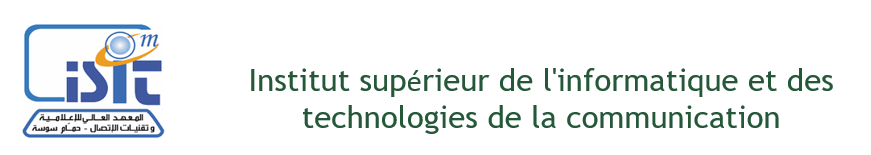

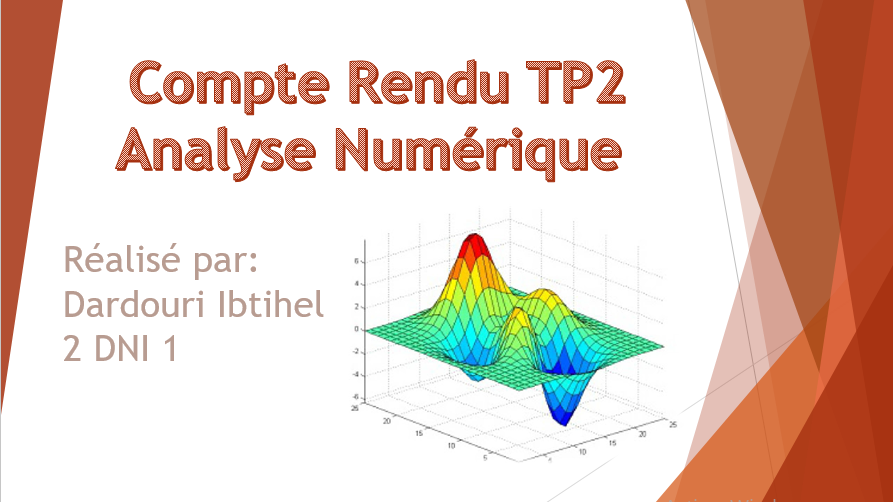

<H1 align="center" ><font color='red'> TP2 Interpolation Numérique</font> </H1> 

## Exercice 1

$$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)(x_0-x_{n-1})}$

**1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.**

In [40]:
from numpy import prod
def pr(X,Y,c):
    S = [] 
    n = len(X)
    
    for i in range(n):
        L =[c-k for k in X]
        for j in range(n):
            if (j == i):                
                L[j] = 1
            else:
                L[j] = L[j]/(X[i] - X[j])   
        S.append(Y[i]*prod(L))
        
    return  sum(S)

In [41]:
X=[1,2, 3, 4];
Y=[-1, 0 ,2, 1];
for k in X:
 print(pr(X,Y,k))


-1.0
0.0
2.0
1.0


**=> on a entré les deux vecteurs X et Y correspondent respectivement aux liste d’abscisses et des ordonnées et par la suite on a calculé le polynome d’interpolation de Lagrange à l'aide de la fonction PR.**

2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [42]:
X=[1,2, 3, 4];
Y=[-1, 0 ,2, 1];

In [43]:
def pr2(X,Y,c):
    S = [] 
    n = len(X)
    for c in X:
            for j in range(n):
                L =[c-xx for xx in X]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(X[j] - X[k])   
                S.append(Y[j]*prod(L))

            return L[3]

In [44]:
for i in X:
    print(pr2(X,Y,i))

1
1
1
1


**3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.**

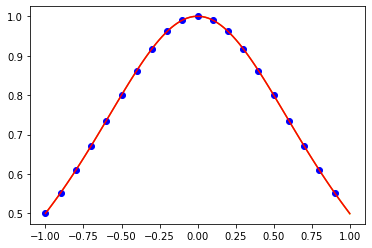

In [45]:
import numpy as np
import matplotlib.pyplot as plt
pn=[]
x=np.arange(-1,1,0.1)
f= lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pn.append(pr(x,y,t[i]))
plt.plot(t,pn,"y",x,y,"bo",t,f(t),"r")
plt.show()


**4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.**

**4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.**

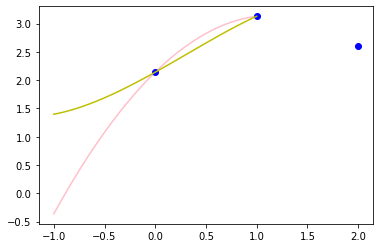

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math
pt=[]
x=np.arange(0,3)
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2=np.vectorize(f)
y=f_2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pt.append(pr(x,y,t[i]))
plt.plot(t,pt,"pink",x,y,"bo",t,f_2(t),"y")
plt.show()

**2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.**

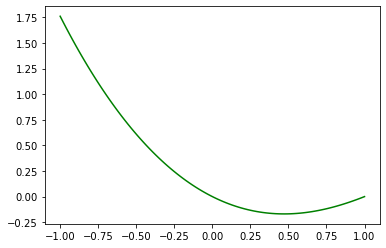

In [55]:
plt.plot(t,f2(t)-pt,"g")
plt.show()

## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

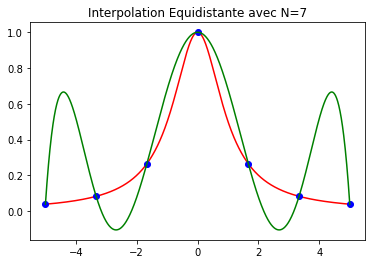

In [58]:
N=7
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")
plt.show()

Text(0.5, 1.0, 'Interpolation Equidistante avec N=8')

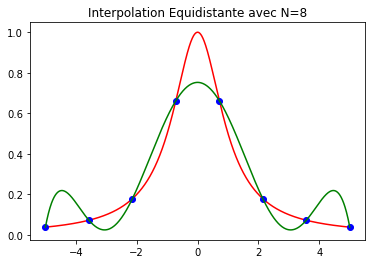

In [57]:
N=8
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000);
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=9')

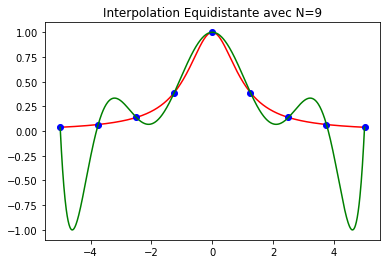

In [59]:
N=9
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

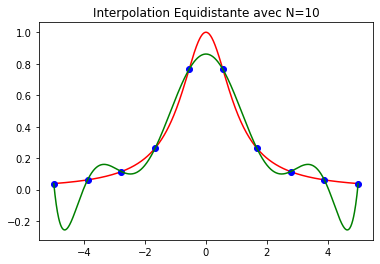

In [60]:
N=10
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")

**=>d'aprés les 3 courbes, on peut dire que sur  [−5,5]  le polynôme d'interpolation de Lagrange de la fonction  𝑓  définie par  𝑓(𝑥)=11+𝑥2 , en  𝑁  points uniformément espacés ne convergent pas correctement aux voisinages de  −1  et  1 , pour  𝑁=7,8,9,10.**

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  

In [61]:
def tcheb(a,b,n):
    V=[]
    for k in range (n):
        V.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return V

tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

**Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).**

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=10')

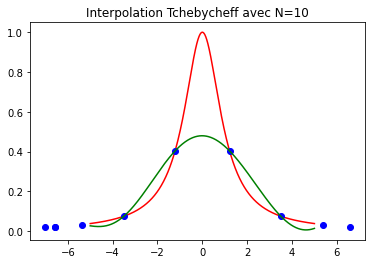

In [63]:

N=10
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=11')

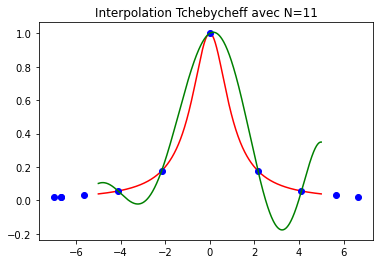

In [65]:
N=11
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=16')

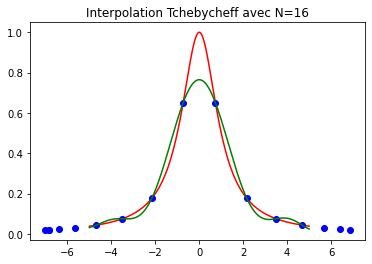

In [66]:
N=16
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

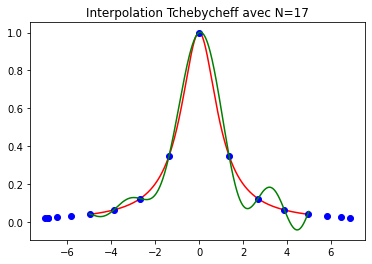

In [67]:
N=17
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")

## Exercice 3

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>